In [11]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pyreadr
from pgmpy.utils import get_example_model
from pgmpy.inference import BeliefPropagation
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd 

A brief problem description

Inference 

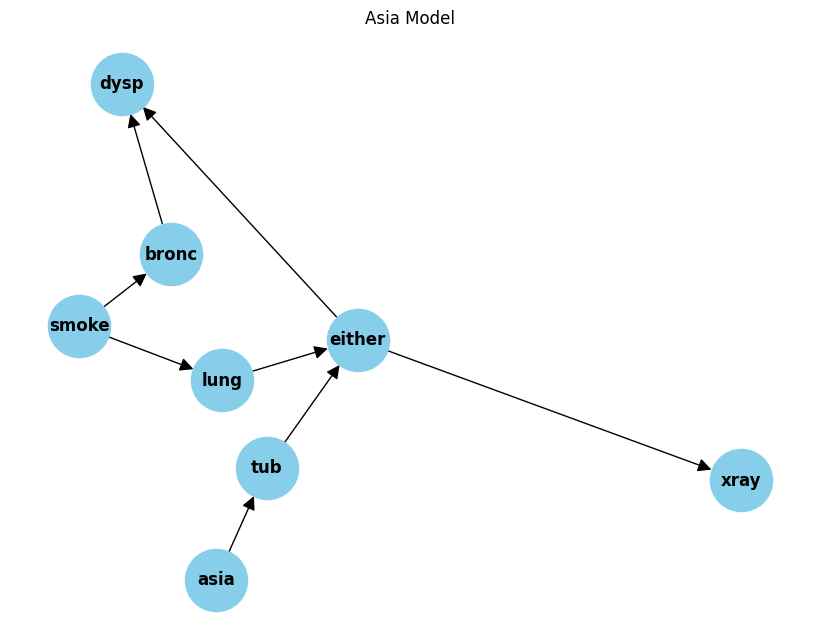

+-----------+------------+-------------------+
| asia      | smoke      |   phi(asia,smoke) |
+===========+============+===================+
| asia(yes) | smoke(yes) |            0.0091 |
+-----------+------------+-------------------+
| asia(yes) | smoke(no)  |            0.0009 |
+-----------+------------+-------------------+
| asia(no)  | smoke(yes) |            0.9000 |
+-----------+------------+-------------------+
| asia(no)  | smoke(no)  |            0.0900 |
+-----------+------------+-------------------+


In [16]:
asia_model = get_example_model('asia')

edges = asia_model.edges()
nodes = asia_model.nodes()

# Create NetworkX graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Asia Model")
plt.show()

bp = BeliefPropagation(asia_model)

result = bp.query(variables=["asia", "smoke"], evidence={"lung": "yes"})
print(result)

Learning 

In [19]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

In [50]:
asia_model = get_example_model('asia')

edges = asia_model.edges()
nodes = asia_model.nodes()

values = pd.DataFrame(np.random.randint(low=0, high=2, size=(1000, len(nodes))),
                      columns=nodes)

estimator = MaximumLikelihoodEstimator(asia_model, values)

print(estimator.get_parameters())

for cpd in estimator.get_parameters():
    print(cpd)

[<TabularCPD representing P(asia:2) at 0x1e7ac0a3d90>, <TabularCPD representing P(tub:2 | asia:2) at 0x1e7b2757350>, <TabularCPD representing P(smoke:2) at 0x1e7aef8a7d0>, <TabularCPD representing P(lung:2 | smoke:2) at 0x1e80dfadc10>, <TabularCPD representing P(bronc:2 | smoke:2) at 0x1e7a0c4a490>, <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x1e81541de50>, <TabularCPD representing P(xray:2 | either:2) at 0x1e815442a50>, <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x1e8154df990>]
+---------+-------+
| asia(0) | 0.477 |
+---------+-------+
| asia(1) | 0.523 |
+---------+-------+
+--------+---------------------+-------------------+
| asia   | asia(0)             | asia(1)           |
+--------+---------------------+-------------------+
| tub(0) | 0.48846960167714887 | 0.497131931166348 |
+--------+---------------------+-------------------+
| tub(1) | 0.5115303983228512  | 0.502868068833652 |
+--------+---------------------+-------------------+
+----------+-----